In [76]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..//")
import farField.farField as ff

In [77]:
data0 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Cuppoletti Lab" \
            "\\NearFieldAcousticDuctedRotor\\slade mic data\\20220725\\ducted\\tm0.50" \
            "\\mic6inplane\\"

troydata2 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\02Inch\\70_Percent.tdms"
troydata12 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\12Inch\\70_Percent.tdms"
troydata24 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\24Inch\\70_Percent.tdms"
troydata36 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor1\\36Inch\\70_Percent.tdms"
troydata48 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor1\\48Inch\\70_Percent.tdms"
troydata60 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor - Riley, Troy (riley2tm)'s files\\60Inch\\70_Percent.tdms"
troydata96 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\96Inch\\70_Percent.tdms"

mymicData = ff.micData(data0, 204800, 5)
troy2 = ff.micData(troydata2, 204800, 15, True)
troy12 = ff.micData(troydata12, 204800, 15, True)
troy24 = ff.micData(troydata24, 204800, 15, True)
troy36 = ff.micData(troydata36, 204800, 15, True)
troy48 = ff.micData(troydata48, 204800, 15, True)
troy60 = ff.micData(troydata60, 204800, 15, True)
troy96 = ff.micData(troydata96, 204800, 15, True)

In [78]:
corfac = np.array([1., 1., 1., 1., 1., 1., 1., 1.])
mymicData.dataProcess(corfac)
troy2.dataProcess(corfac)
troy12.dataProcess(corfac)
troy24.dataProcess(corfac)
troy36.dataProcess(corfac)
troy48.dataProcess(corfac)
troy60.dataProcess(corfac)
troy96.dataProcess(corfac)

In [79]:
spl0, freq0 = mymicData.narrowband(0, 50)
spl6, freq6 = mymicData.narrowband(6, 50)
spl12, freq12 = mymicData.narrowband(12, 50)
troyspl2, troyfreq2 = troy2.narrowband(0, 100)
troyspl12, troyfreq12 = troy12.narrowband(0, 100)
troyspl24, troyfreq24 = troy24.narrowband(0, 100)
troyspl36, troyfreq36 = troy36.narrowband(0, 100)
troyspl48, troyfreq48 = troy48.narrowband(0, 100)
troyspl60, troyfreq60 = troy60.narrowband(0, 100)
troyspl96, troyfreq96 = troy96.narrowband(0, 100)

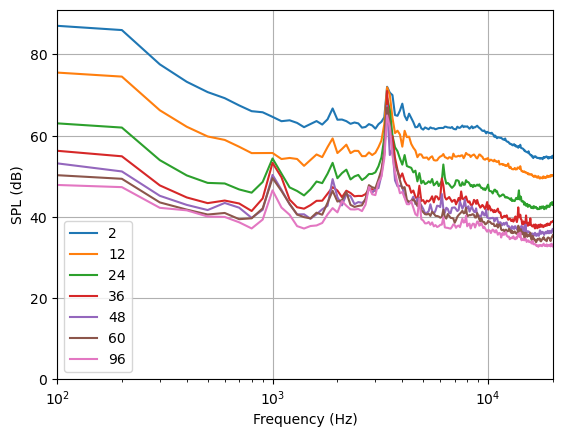

In [80]:
plt.plot(troyfreq2, troyspl2[6], label="2")
plt.plot(troyfreq12, troyspl12[6], label="12")
plt.plot(troyfreq24, troyspl24[6], label="24")
plt.plot(troyfreq36, troyspl36[6], label="36")
plt.plot(troyfreq48, troyspl48[6], label="48")
plt.plot(troyfreq60, troyspl60[6], label="60")
plt.plot(troyfreq96, troyspl96[6], label="96")
plt.xscale("log")
plt.xlim([100, 20000])
plt.legend()
plt.ylim(0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.grid()
plt.show()

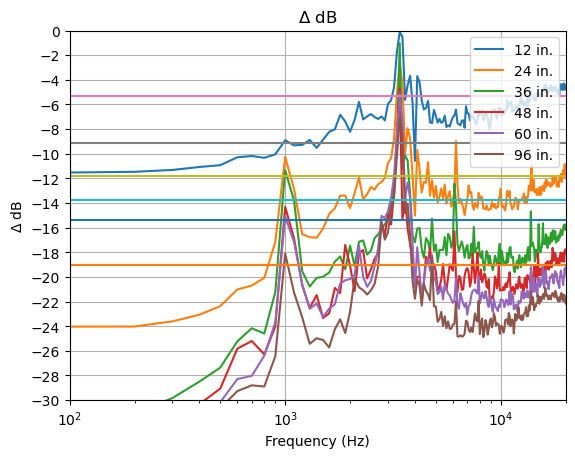

In [81]:
troy12d = troyspl12[6] - troyspl2[6]
troy24d = troyspl24[6] - troyspl2[6]
troy36d = troyspl36[6] - troyspl2[6]
troy48d = troyspl48[6] - troyspl2[6]
troy60d = troyspl60[6] - troyspl2[6]
troy96d = troyspl96[6] - troyspl2[6]
plt.plot(troyfreq12, troy12d, label="12 in.")
plt.plot(troyfreq24, troy24d, label="24 in.")
plt.plot(troyfreq36, troy36d, label="36 in.")
plt.plot(troyfreq48, troy48d, label="48 in.")
plt.plot(troyfreq60, troy60d, label="60 in.")
plt.plot(troyfreq96, troy96d, label="96 in.")
plt.xscale("log")
plt.xlim([100, 20000])
plt.plot([0, 204800], [-5.33, -5.33])
plt.plot([0, 204800], [-9.133, -9.133])
plt.plot([0, 204800], [-11.77, -11.77])
plt.plot([0, 204800], [-13.783, -13.783])
plt.plot([0, 204800], [-15.417, -15.417])
plt.plot([0, 204800], [-19.02, -19.02])
plt.ylim([-30, 0])
plt.legend(loc="upper right")
plt.xlabel("Frequency (Hz)")
plt.ylabel("$\Delta$ dB")
plt.title("$\Delta$ dB")
plt.yticks(np.arange(0, -31, -2))
plt.grid()
plt.show()

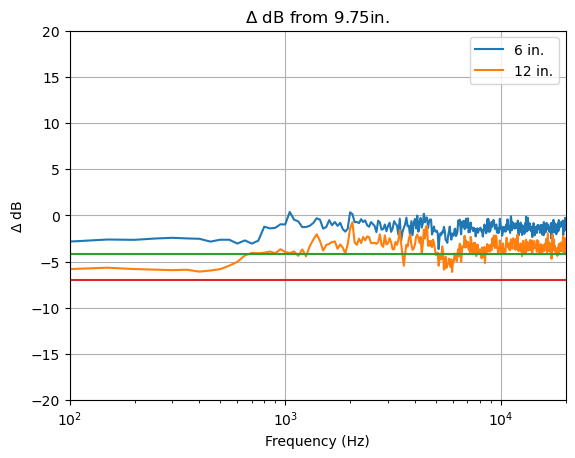

In [84]:
m6 = spl6[6] - spl0[6]
m12 = spl12[6] - spl0[6]
plt.plot(freq6, m6, label="6 in.")
plt.plot(freq12, m12, label="12 in.")
plt.plot([0, 204800], [-4.15, -4.15])
plt.plot([0, 204800], [-6.95, -6.95])
plt.xscale("log")
plt.xlim([100, 20000])
plt.legend()
plt.ylim([-20, 20])
plt.xlabel("Frequency (Hz)")
plt.ylabel("$\Delta$ dB")
plt.title("$\Delta$ dB from 9.75in.")
plt.grid()
plt.show()